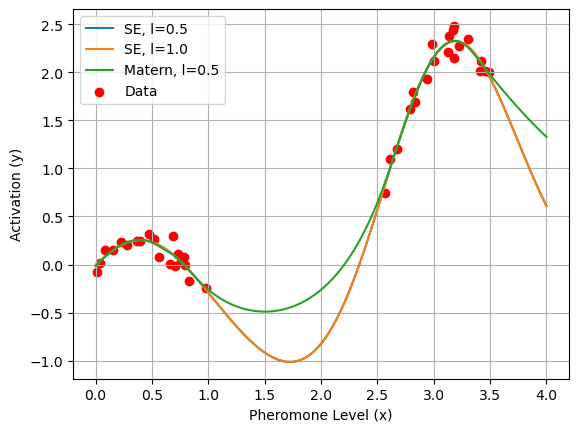

Log-Likelihoods: [('SE, l=0.5', 19.848682689969678), ('SE, l=1.0', 19.848682689951204), ('Matern, l=0.5', 16.466861639660344)]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

# Load data
data = pd.read_csv('pheronome_csv.csv', header=None)
X = data[0].values.reshape(-1, 1)
y = data[1].values

# Experiment with kernels and parameters
kernels = [
    (1.0**2 * RBF(length_scale=0.5), 'SE, l=0.5'),
    (1.0**2 * RBF(length_scale=1.0), 'SE, l=1.0'),
    (1.0**2 * Matern(length_scale=0.5, nu=1.5), 'Matern, l=0.5')
]
results = []
for kernel, name in kernels:
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, optimizer='fmin_l_bfgs_b')
    gp.fit(X, y)
    log_likelihood = gp.log_marginal_likelihood()
    results.append((name, log_likelihood))
    x_pred = np.linspace(0, 4, 100).reshape(-1, 1)
    y_pred, sigma = gp.predict(x_pred, return_std=True)
    plt.plot(x_pred, y_pred, label=name)
plt.scatter(X, y, c='red', label='Data')
plt.xlabel('Pheromone Level (x)')
plt.ylabel('Activation (y)')
plt.legend()
plt.grid(True)
plt.savefig('gp_fit.png')
plt.show()
print('Log-Likelihoods:', results)